### **Dataset Digits**

1) Load dataset

In [ ]:
!pip install scikit-learn
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


digits = load_digits()

2) Entender el dataset
3) plotear ejemplos

Datos: (1797, 64)
Etiquetas: (1797,)


<Figure size 640x480 with 0 Axes>

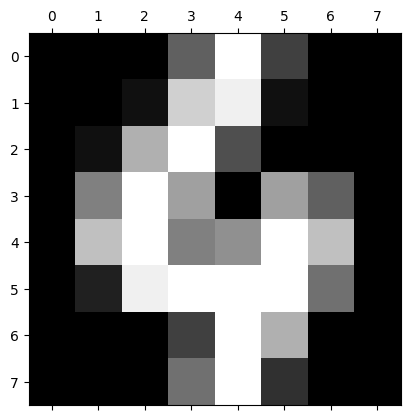

Etiqueta de la imagen: 4


<Figure size 640x480 with 0 Axes>

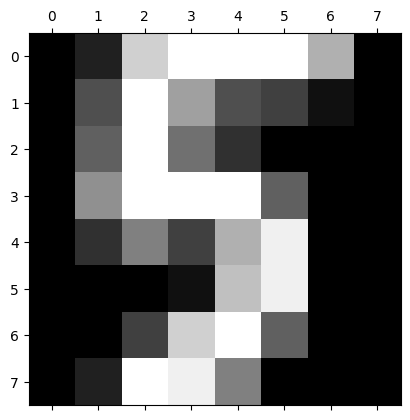

Etiqueta de la imagen: 5


<Figure size 640x480 with 0 Axes>

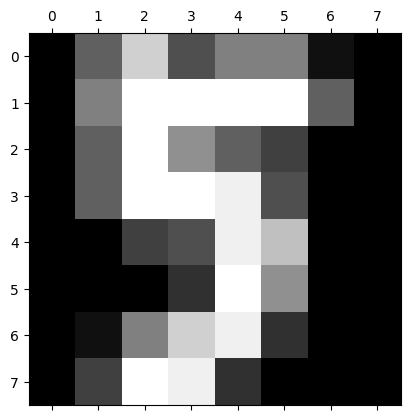

Etiqueta de la imagen: 5
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
4
6
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2
8
2
2
5
7
9
5
4
8
8
4
9
0
8
9
8
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


In [ ]:
print("Datos:", digits.data.shape)
print("Etiquetas:", digits.target.shape)

plt.gray()  # Convertir la imagen a escala de grises
plt.matshow(digits.images[64])  # Mostrar la imagen
plt.show()
print("Etiqueta de la imagen:", digits.target[64])

plt.gray()  # Convertir la imagen a escala de grises
plt.matshow(digits.images[32])  # Mostrar la imagen
plt.show()
print("Etiqueta de la imagen:", digits.target[32])
plt.gray()  # Convertir la imagen a escala de grises

plt.matshow(digits.images[33])  # Mostrar la imagen
plt.show()
print("Etiqueta de la imagen:", digits.target[33])

for i in range(1, 150):
  print(digits.target[i])

4) Estadistica descriptiva

In [ ]:
data = digits.data
df = pd.DataFrame(data)
print(df.describe)

<bound method NDFrame.describe of        0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   6

Por lo que entiendo, cada renglon es un numero entre el 0 y el 9, a su vez cada numero tiene 64 columnas que representan la matriz de 8x8 para hacer la impresion de los numeros pixelados, cada pixel tiene su tono de color siendo el 0 negro y mientras más grande el dato más blanco será.

5)Boxplot y scatterplox

In [ ]:
print(digits.data.shape)

(1797, 64)


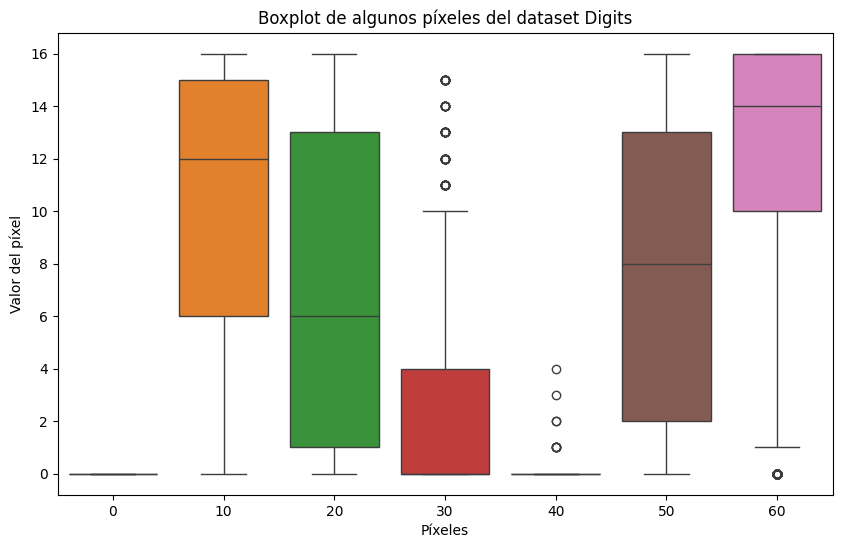

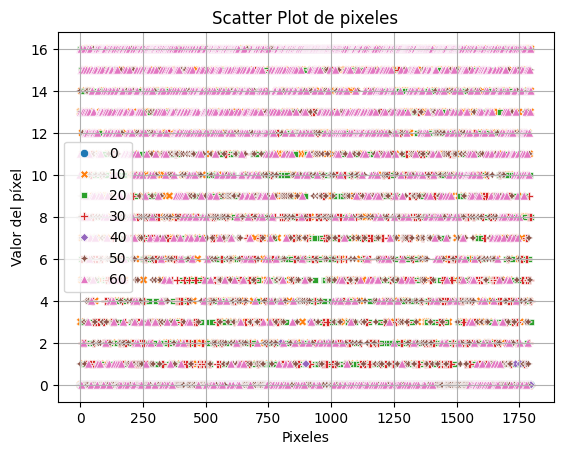

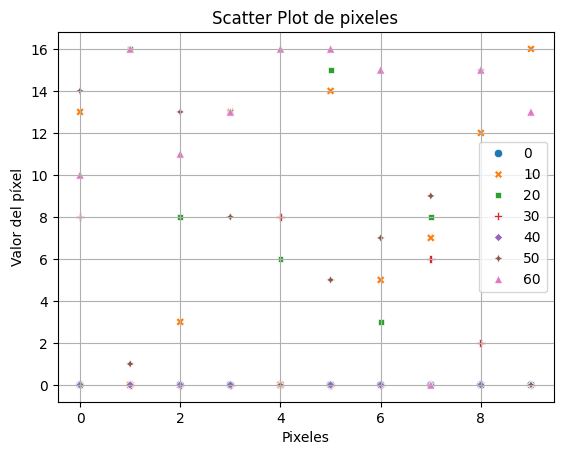

In [ ]:
selected_columns = df.iloc[:, [0, 10, 20, 30, 40,50,60]]

plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_columns)
plt.title("Boxplot de algunos píxeles del dataset Digits")
plt.xlabel("Píxeles")
plt.ylabel("Valor del píxel")
plt.show()

sns.scatterplot(data = selected_columns)
plt.title('Scatter Plot de pixeles')
plt.xlabel('Pixeles')
plt.ylabel('Valor del píxel')
plt.grid(True)
plt.show()

limited_data = selected_columns.head(10)
sns.scatterplot(data = limited_data)
plt.title('Scatter Plot de pixeles')
plt.xlabel('Pixeles')
plt.ylabel('Valor del píxel')
plt.grid(True)
plt.show()


6) kmeans

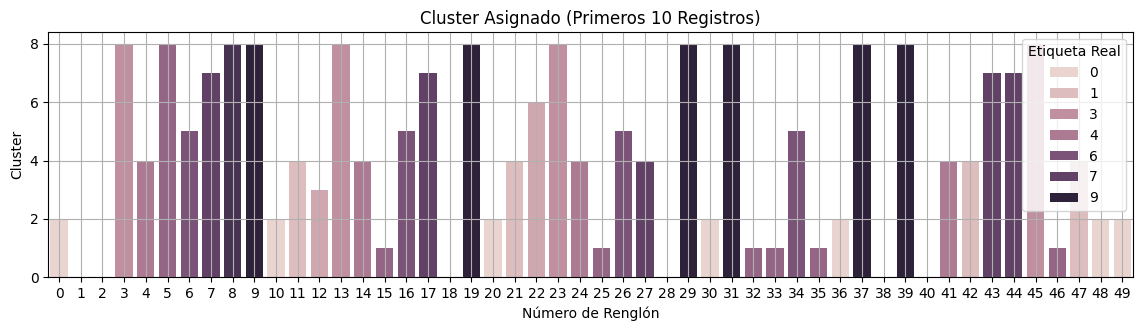

Primeras 10 filas del DataFrame con columnas específicas:
    Pixel_60  Pixel_61  Pixel_62  Pixel_63  Cluster  Etiqueta Real
0  -0.366771 -1.146647 -0.505670 -0.196008        2              0
1   0.849632  0.548561 -0.505670 -0.196008        0              1
2  -0.164037  1.565686  1.695137 -0.196008        0              2
3   0.241430  0.379040 -0.505670 -0.196008        8              3
4   0.849632 -0.468564 -0.505670 -0.196008        4              4
5   0.849632  0.548561 -0.505670 -0.196008        8              5
6   0.646898  0.718081  0.227932 -0.196008        5              6
7  -2.394110 -1.146647 -0.505670 -0.196008        7              7
8   0.646898  0.718081 -0.261136 -0.196008        8              8
9   0.241430 -0.638085 -0.505670 -0.196008        8              9
10  0.241430 -0.638085 -0.505670 -0.196008        2              0
11  0.241430  1.565686 -0.261136 -0.196008        4              1
12 -0.772239  1.057123  2.428739  1.954988        3              2
13  

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(digits.data)

# Aplicar K-Means con 10 clústeres
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Crear un DataFrame para facilitar la visualización
df = pd.DataFrame(data_scaled, columns=[f'Pixel_{i}' for i in range(data_scaled.shape[1])])
df['Cluster'] = labels
df['Etiqueta Real'] = digits.target

# Agregar el número de fila (renglón) al DataFrame
df['Fila'] = df.index

# Seleccionar los primeros 10 registros
df_top10 = df.head(50)

# Visualización
plt.figure(figsize=(14, 7))

# Plot 1: Cluster asignado para los primeros 10 registros
plt.subplot(2, 1, 1)
sns.barplot(x='Fila', y='Cluster',hue='Etiqueta Real', data=df_top10)
plt.title('Cluster Asignado (Primeros 10 Registros)')
plt.xlabel('Número de Renglón')
plt.ylabel('Cluster')
plt.grid(True)
plt.show()

# Imprimir las primeras 10 filas del DataFrame
print("Primeras 10 filas del DataFrame con columnas específicas:")
print(df_top10[['Pixel_60', 'Pixel_61', 'Pixel_62', 'Pixel_63', 'Cluster', 'Etiqueta Real']])


7) Kmeans con solo  las variables de una de las filas
    ¿con que fila se hace bien o mal?

In [ ]:
data_subset = digits.data[:, :8]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Aplicar K-Means con 10 clústeres
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Reducir la dimensionalidad a 2D usando PCA para la visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Crear un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = labels
df_pca['Etiqueta Real'] = digits.target

# Añadir las columnas de interés al DataFrame original
df = pd.DataFrame(data_scaled, columns=[f'Pixel_{i}' for i in range(data_scaled.shape[1])])
df['Cluster'] = labels
df['Etiqueta Real'] = digits.target

# Seleccionar las columnas de interés
df_selected = df[['Cluster', 'Etiqueta Real']]

# Imprimir una muestra de 50 filas
print("Primeras 50 filas del DataFrame con columnas específicas:")
print(df_selected.head(50))

Primeras 50 filas del DataFrame con columnas específicas:
    Cluster  Etiqueta Real
0         0              0
1         0              1
2         7              2
3         1              3
4         7              4
5         8              5
6         0              6
7         2              7
8         8              8
9         8              9
10        9              0
11        7              1
12        8              2
13        3              3
14        0              4
15        6              5
16        0              6
17        9              7
18        9              8
19        8              9
20        0              0
21        7              1
22        8              2
23        3              3
24        7              4
25        1              5
26        0              6
27        9              7
28        8              8
29        8              9
30        1              0
31        0              9
32        2              5
33        6             

In [ ]:
data_subset = digits.data[:, 8:16]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Aplicar K-Means con 10 clústeres
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Reducir la dimensionalidad a 2D usando PCA para la visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Crear un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = labels
df_pca['Etiqueta Real'] = digits.target

# Añadir las columnas de interés al DataFrame original
df = pd.DataFrame(data_scaled, columns=[f'Pixel_{i}' for i in range(data_scaled.shape[1])])
df['Cluster'] = labels
df['Etiqueta Real'] = digits.target

# Seleccionar las columnas de interés
df_selected = df[['Cluster', 'Etiqueta Real']]

# Imprimir una muestra de 50 filas
print("Primeras 50 filas del DataFrame con columnas específicas:")
print(df_selected.head(50))

Primeras 50 filas del DataFrame con columnas específicas:
    Cluster  Etiqueta Real
0         1              0
1         7              1
2         1              2
3         0              3
4         7              4
5         1              5
6         3              6
7         8              7
8         1              8
9         9              9
10        8              0
11        2              1
12        3              2
13        8              3
14        7              4
15        0              5
16        7              6
17        1              7
18        1              8
19        3              9
20        1              0
21        2              1
22        9              2
23        8              3
24        7              4
25        9              5
26        7              6
27        2              7
28        1              8
29        9              9
30        6              0
31        7              9
32        6              5
33        0             

In [ ]:
data_subset = digits.data[:, 16:24]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Aplicar K-Means con 10 clústeres
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Reducir la dimensionalidad a 2D usando PCA para la visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Crear un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = labels
df_pca['Etiqueta Real'] = digits.target

# Añadir las columnas de interés al DataFrame original
df = pd.DataFrame(data_scaled, columns=[f'Pixel_{i}' for i in range(data_scaled.shape[1])])
df['Cluster'] = labels
df['Etiqueta Real'] = digits.target

# Seleccionar las columnas de interés
df_selected = df[['Cluster', 'Etiqueta Real']]

# Imprimir una muestra de 50 filas
print("Primeras 50 filas del DataFrame con columnas específicas:")
print(df_selected.head(50))

Primeras 50 filas del DataFrame con columnas específicas:
    Cluster  Etiqueta Real
0         4              0
1         0              1
2         6              2
3         0              3
4         0              4
5         6              5
6         9              6
7         7              7
8         4              8
9         6              9
10        4              0
11        0              1
12        2              2
13        7              3
14        4              4
15        2              5
16        9              6
17        1              7
18        0              8
19        0              9
20        1              0
21        0              1
22        7              2
23        4              3
24        0              4
25        2              5
26        9              6
27        4              7
28        4              8
29        6              9
30        1              0
31        0              9
32        2              5
33        2             

In [ ]:
data_subset = digits.data[:, 24:32]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Aplicar K-Means con 10 clústeres
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Reducir la dimensionalidad a 2D usando PCA para la visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Crear un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = labels
df_pca['Etiqueta Real'] = digits.target

# Añadir las columnas de interés al DataFrame original
df = pd.DataFrame(data_scaled, columns=[f'Pixel_{i}' for i in range(data_scaled.shape[1])])
df['Cluster'] = labels
df['Etiqueta Real'] = digits.target

# Seleccionar las columnas de interés
df_selected = df[['Cluster', 'Etiqueta Real']]

# Imprimir una muestra de 50 filas
print("Primeras 50 filas del DataFrame con columnas específicas:")
print(df_selected.head(50))

Primeras 50 filas del DataFrame con columnas específicas:
    Cluster  Etiqueta Real
0         2              0
1         4              1
2         6              2
3         3              3
4         0              4
5         7              5
6         9              6
7         0              7
8         1              8
9         1              9
10        2              0
11        1              1
12        6              2
13        3              3
14        2              4
15        4              5
16        7              6
17        6              7
18        3              8
19        3              9
20        2              0
21        1              1
22        6              2
23        6              3
24        2              4
25        9              5
26        9              6
27        0              7
28        3              8
29        1              9
30        2              0
31        6              9
32        4              5
33        4             

In [ ]:
data_subset = digits.data[:, 32:40]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Aplicar K-Means con 10 clústeres
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Reducir la dimensionalidad a 2D usando PCA para la visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Crear un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = labels
df_pca['Etiqueta Real'] = digits.target

# Añadir las columnas de interés al DataFrame original
df = pd.DataFrame(data_scaled, columns=[f'Pixel_{i}' for i in range(data_scaled.shape[1])])
df['Cluster'] = labels
df['Etiqueta Real'] = digits.target

# Seleccionar las columnas de interés
df_selected = df[['Cluster', 'Etiqueta Real']]

# Imprimir una muestra de 50 filas
print("Primeras 50 filas del DataFrame con columnas específicas:")
print(df_selected.head(50))

Primeras 50 filas del DataFrame con columnas específicas:
    Cluster  Etiqueta Real
0         6              0
1         8              1
2         8              2
3         3              3
4         6              4
5         9              5
6         0              6
7         5              7
8         8              8
9         2              9
10        6              0
11        5              1
12        3              2
13        3              3
14        1              4
15        8              5
16        4              6
17        4              7
18        0              8
19        9              9
20        6              0
21        3              1
22        8              2
23        3              3
24        7              4
25        0              5
26        0              6
27        1              7
28        5              8
29        9              9
30        6              0
31        9              9
32        3              5
33        3             

En general no se hace especialmente bien en ninguna, hay casos en los que masomenos un cluster agarra bien los diferentes datos pero en lo personal siento que es mas que nada casualidad

8) Lo mismo pero con columnas

In [ ]:
columns_to_use = [0, 8, 16, 24, 32, 40, 48, 56]
data_subset = digits.data[:, columns_to_use]

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Aplicar K-Means con 10 clústeres
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Reducir la dimensionalidad a 2D usando PCA para la visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Crear un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = labels
df_pca['Etiqueta Real'] = digits.target

# Añadir las columnas de interés al DataFrame original
df = pd.DataFrame(data_scaled, columns=[f'Pixel_{i}' for i in range(data_scaled.shape[1])])
df['Cluster'] = labels
df['Etiqueta Real'] = digits.target

# Seleccionar las columnas de interés
df_selected = df[['Cluster', 'Etiqueta Real']]

# Imprimir una muestra de 50 filas
print("Primeras 50 filas del DataFrame con columnas específicas:")
print(df_selected.head(50))

Primeras 50 filas del DataFrame con columnas específicas:
    Cluster  Etiqueta Real
0         0              0
1         0              1
2         0              2
3         0              3
4         0              4
5         0              5
6         0              6
7         0              7
8         0              8
9         0              9
10        0              0
11        0              1
12        0              2
13        0              3
14        0              4
15        0              5
16        0              6
17        0              7
18        0              8
19        0              9
20        0              0
21        0              1
22        0              2
23        0              3
24        0              4
25        0              5
26        0              6
27        0              7
28        0              8
29        0              9
30        0              0
31        0              9
32        0              5
33        0             

In [ ]:
columns_to_use = [1, 9, 17, 25, 33, 41, 49, 57]
data_subset = digits.data[:, columns_to_use]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Aplicar K-Means con 10 clústeres
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Reducir la dimensionalidad a 2D usando PCA para la visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Crear un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = labels
df_pca['Etiqueta Real'] = digits.target

# Añadir las columnas de interés al DataFrame original
df = pd.DataFrame(data_scaled, columns=[f'Pixel_{i}' for i in range(data_scaled.shape[1])])
df['Cluster'] = labels
df['Etiqueta Real'] = digits.target

# Seleccionar las columnas de interés
df_selected = df[['Cluster', 'Etiqueta Real']]

# Imprimir una muestra de 50 filas
print("Primeras 50 filas del DataFrame con columnas específicas:")
print(df_selected.head(50))

Primeras 50 filas del DataFrame con columnas específicas:
    Cluster  Etiqueta Real
0         6              0
1         8              1
2         5              2
3         4              3
4         6              4
5         1              5
6         1              6
7         1              7
8         1              8
9         1              9
10        6              0
11        1              1
12        1              2
13        2              3
14        9              4
15        7              5
16        1              6
17        4              7
18        1              8
19        1              9
20        8              0
21        8              1
22        1              2
23        1              3
24        6              4
25        8              5
26        6              6
27        6              7
28        1              8
29        1              9
30        3              0
31        1              9
32        2              5
33        7             

In [ ]:
columns_to_use = [2, 10, 18, 26, 34, 42, 50, 58]
data_subset = digits.data[:, columns_to_use]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Aplicar K-Means con 10 clústeres
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Reducir la dimensionalidad a 2D usando PCA para la visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Crear un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = labels
df_pca['Etiqueta Real'] = digits.target

# Añadir las columnas de interés al DataFrame original
df = pd.DataFrame(data_scaled, columns=[f'Pixel_{i}' for i in range(data_scaled.shape[1])])
df['Cluster'] = labels
df['Etiqueta Real'] = digits.target

# Seleccionar las columnas de interés
df_selected = df[['Cluster', 'Etiqueta Real']]

# Imprimir una muestra de 50 filas
print("Primeras 50 filas del DataFrame con columnas específicas:")
print(df_selected.head(50))

Primeras 50 filas del DataFrame con columnas específicas:
    Cluster  Etiqueta Real
0         5              0
1         9              1
2         6              2
3         8              3
4         6              4
5         3              5
6         1              6
7         2              7
8         7              8
9         3              9
10        5              0
11        9              1
12        0              2
13        8              3
14        9              4
15        3              5
16        6              6
17        2              7
18        2              8
19        8              9
20        5              0
21        9              1
22        0              2
23        8              3
24        9              4
25        3              5
26        5              6
27        9              7
28        7              8
29        4              9
30        5              0
31        6              9
32        3              5
33        3             

In [ ]:
columns_to_use = [3, 11, 19, 27, 35, 43, 51, 59]
data_subset = digits.data[:, columns_to_use]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_subset)

# Aplicar K-Means con 10 clústeres
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Reducir la dimensionalidad a 2D usando PCA para la visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Crear un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = labels
df_pca['Etiqueta Real'] = digits.target

# Añadir las columnas de interés al DataFrame original
df = pd.DataFrame(data_scaled, columns=[f'Pixel_{i}' for i in range(data_scaled.shape[1])])
df['Cluster'] = labels
df['Etiqueta Real'] = digits.target

# Seleccionar las columnas de interés
df_selected = df[['Cluster', 'Etiqueta Real']]

# Imprimir una muestra de 50 filas
print("Primeras 50 filas del DataFrame con columnas específicas:")
print(df_selected.head(50))

Primeras 50 filas del DataFrame con columnas específicas:
    Cluster  Etiqueta Real
0         5              0
1         8              1
2         3              2
3         1              3
4         6              4
5         7              5
6         3              6
7         0              7
8         4              8
9         4              9
10        5              0
11        6              1
12        5              2
13        1              3
14        9              4
15        7              5
16        3              6
17        2              7
18        4              8
19        7              9
20        5              0
21        6              1
22        2              2
23        5              3
24        6              4
25        4              5
26        8              6
27        4              7
28        4              8
29        7              9
30        5              0
31        7              9
32        7              5
33        7             

Por lo que veo la mejor opcion es hacer cluster con todos los datos ya que solo agarrar una seccion de columnas hace que se revuelva en gran medida los datos, haciendo que sean dificiles de diferenciar. Eso si, estaría bien limiitar ciertas columnas y renglones pues sobre todo en las esquinas y bordes suelen ser negras asi que estos datos se podrian descartar.